<a href="https://colab.research.google.com/github/chandorasakshi/assignment/blob/master/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




SMS Spam Collection Data Set
Dataset information
This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link]. -> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link]. -> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link]. -> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.

In [30]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.tail()

,target,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [32]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [34]:
df.shape

(5572, 2)

In [35]:
df.target.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: target, dtype: float64

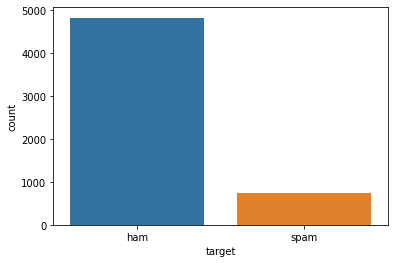

In [36]:
sns.countplot(x='target',data=df)

In [37]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [41]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
clean_lst=[]
len_lst=[]

In [39]:
def preprocess(raw_data, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_data)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_lst.append(" ".join(words))
    
    len_lst.append(len(words))


In [43]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [44]:
clean_lst = []

len_lst = []

df['message'].apply(lambda x: preprocess(x, 'stem'))

df['clean_stem'] = clean_lst

df['stem_length'] = len_lst


In [45]:
clean_lst = []

len_lst = []

df['message'].apply(lambda x: preprocess(x, 'lemma'))

df['clean_lemma'] = clean_lst

df['lemma_length'] = len_lst


In [46]:
df.head()

,target,message,clean_stem,stem_length,clean_lemma,lemma_length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


In [47]:
df.describe()

,stem_length,lemma_length
count,5572.000000,5572.000000
mean,9.031048,9.031048
std,6.788753,6.788753
min,0.000000,0.000000
25%,4.000000,4.000000
50%,7.000000,7.000000
75%,13.000000,13.000000
max,77.000000,77.000000


In [48]:
df['target_num']=df['target'].apply(lambda x: 0 if x=='ham' else 1)
df.head()

,target,message,clean_stem,stem_length,clean_lemma,lemma_length,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,0


In [49]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)


In [50]:
train_clean=[]
for msg in train['clean_stem']:
    train_clean.append(msg)

test_clean=[]
for msg in test['clean_stem']:
    test_clean.append(msg)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean)

test_features = vectorizer.transform(test_clean)


In [52]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)


Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score
from sklearn import metrics


In [56]:
Classifiers = [ LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]


In [57]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target_num'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['target_num'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    con_metric=metrics.confusion_matrix(test['target_num'],pred)
    print(con_metric)
    print(metrics.classification_report(test['target_num'],pred))

 33%|███▎      | 1/3 [00:01<00:03,  1.74s/it]

Accuracy of LogisticRegression is 0.9838565022421525
[[965   1]
 [ 17 132]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



 67%|██████▋   | 2/3 [00:14<00:04,  4.92s/it]

Accuracy of DecisionTreeClassifier is 0.9757847533632287
[[960   6]
 [ 21 128]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.86      0.90       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



100%|██████████| 3/3 [01:32<00:00, 30.84s/it]

Accuracy of SVC is 0.9838565022421525
[[966   0]
 [ 18 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

